In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dark_matter.csv")

In [3]:
df_copy = df.copy()

In [4]:
df = df.drop(df.index[8474])
df = df.drop(df.index[6815])

In [5]:
df_copy = df_copy.drop(df.index[8474])
df_copy = df_copy.drop(df.index[6815])

In [6]:
x = df.loc[:, ~df.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y = df.loc[:, df.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [7]:
x_log = x.copy()

In [8]:
x_log = x.transform(lambda a: np.log(a))

In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_log[x.columns] = scaler.fit_transform(x_log[x.columns])

In [10]:
x_log.head()

,mass,kinetic_energy,mean_radius,Group_M_Crit200,Group_M_Crit500,Group_M_Mean200,Group_M_TopHat200,Group_R_Crit200,Group_R_Crit500,Group_R_Mean200,Group_R_TopHat200
0,21.174025,8.344036,0.194935,5.705371,5.598144,5.825421,5.826019,5.705295,5.597937,5.825257,5.826462
1,9.686603,2.983820,0.085244,5.660482,5.068873,5.824574,5.868417,5.660391,5.068701,5.824390,5.868884
2,8.289086,3.366994,0.209044,5.657459,5.627020,5.674491,5.715509,5.657300,5.626899,5.674334,5.715843
3,7.465517,3.218538,0.746296,5.009451,4.930719,5.105941,5.072324,5.009309,4.930506,5.105816,5.072615
4,6.725421,2.244814,0.083188,5.417539,5.149648,5.404342,5.468534,5.417470,5.149408,5.404188,5.468921


In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as lm
from sklearn import datasets, linear_model, model_selection
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
y.describe()

,dispersion
count,9997.000000
mean,74.139024
std,58.848546
min,0.000000
25%,55.170160
50%,61.293182
75%,70.379020
max,1039.325700


# First Linear Regression Iteration with all the data

In [13]:
X_lr = x_log.copy()

In [14]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = sklearn.model_selection.train_test_split(X_lr, y, test_size = 0.20, random_state = 5)

In [15]:
X_lr_train.shape, X_lr_test.shape, y_lr_train.shape, y_lr_test.shape

((7997, 11), (2000, 11), (7997, 1), (2000, 1))

In [16]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y_lr_train, sm.add_constant(X_lr_train)).fit()
Y_pred = model.predict(sm.add_constant(X_lr_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             dispersion   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     271.8
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:20:20   Log-Likelihood:                -42699.
No. Observations:                7997   AIC:                         8.542e+04
Df Residuals:                    7985   BIC:                         8.551e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                73.6143      0.88

/Users/parth/opt/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


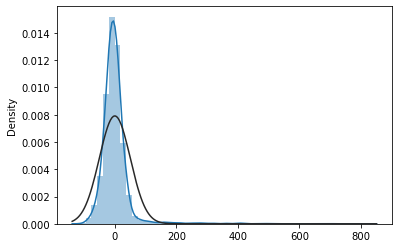

In [17]:
from scipy import stats
sns.distplot(model.resid, fit=stats.norm);

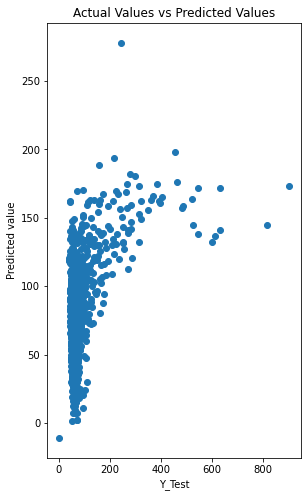

In [20]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(121)
ax.set_xlabel("Y_Test")
ax.set_ylabel("Predicted value")
ax.set_title("Actual Values vs Predicted Values")
plt.scatter(y_lr_test, Y_pred)

In [21]:
y_90 = y.copy()

In [22]:
y.describe()

,dispersion
count,9997.000000
mean,74.139024
std,58.848546
min,0.000000
25%,55.170160
50%,61.293182
75%,70.379020
max,1039.325700


#### We will now perform regression for values of 'dispersion' below 90 and above 90

In [23]:
df_90 = df.copy()

In [24]:
y_90 = y_90[y_90['dispersion'].between(0.00, 90.00)]

In [25]:
y_90.describe()

,dispersion
count,9043.000000
mean,61.382718
std,9.309829
min,0.000000
25%,54.607731
50%,60.022600
75%,66.973970
max,89.970380


In [26]:
df_90 = df_90[df_90['dispersion'].between(0.00, 90.00)]

In [27]:
df_90.describe()

,mass,dispersion,kinetic_energy,mean_radius,Group_M_Crit200,Group_M_Crit500,Group_M_Mean200,Group_M_TopHat200,Group_R_Crit200,Group_R_Crit500,Group_R_Mean200,Group_R_TopHat200
count,9043.000000,9043.000000,9.043000e+03,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000
mean,146.462789,61.382718,7.210497e+06,48.243651,46.411238,35.690916,64.525753,55.989113,108.756913,74.115512,185.055104,146.165356
std,49.981224,9.309829,7.948301e+06,9.514413,88.351517,64.314345,131.350012,110.424604,41.180151,27.154981,72.708482,56.609906
min,1.000000,0.000000,1.475066e+05,23.160006,1.576799,0.931173,3.018168,2.109668,40.782790,25.210709,78.098114,57.126507
25%,112.000000,54.607731,2.423016e+06,42.750617,12.829749,10.377800,16.728206,14.907875,82.026480,56.312062,138.207560,109.618630
50%,133.000000,60.022600,4.789329e+06,46.747287,20.224848,16.378328,26.418990,23.430400,95.465800,65.563780,160.944370,127.449295
75%,166.000000,66.973970,9.109586e+06,51.849725,41.125671,32.741615,54.594565,48.050594,120.944577,82.593955,205.003515,161.922240
max,479.000000,89.970380,1.510843e+08,467.233497,1727.055700,1283.849500,2242.356700,2024.290600,420.391480,280.601930,707.306640,563.435670


In [28]:
x90 = df_90.loc[:, ~df_90.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y90 = df_90.loc[:, df_90.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [29]:
x90.shape

(9043, 11)

In [30]:
x90_log = x90.transform(lambda a: np.log(a))

In [31]:
X90=x90_log
y90=y90

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X90, y90, test_size = 0.20, random_state = 5)

In [32]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y90_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             dispersion   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1002.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:54:26   Log-Likelihood:                -23110.
No. Observations:                7234   AIC:                         4.624e+04
Df Residuals:                    7222   BIC:                         4.633e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.735e+04    2.5e+0

/Users/parth/opt/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


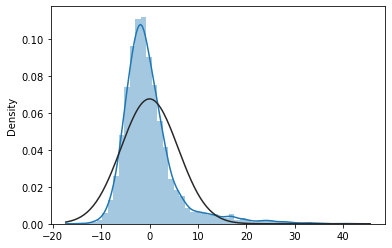

In [33]:
from scipy import stats
sns.distplot(model.resid, fit=stats.norm);

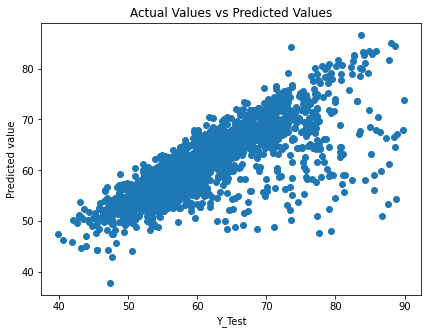

In [38]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.set_xlabel("Y_Test")
ax.set_ylabel("Predicted value")
ax.set_title("Actual Values vs Predicted Values")
plt.scatter(y_test, y90_pred)

In [39]:
#Step 1
y_1=y.copy()

In [40]:
#Now plotting the model with the rest of the data (i.e. dispersion over 90)
y_1 = y_1[y_1['dispersion'].between(90.00, 1500.00)]
y_1.describe()

,dispersion
count,954.000000
mean,195.056500
std,139.004064
min,90.051380
25%,105.302765
50%,139.641120
75%,228.227293
max,1039.325700


In [41]:
#Step 2
df_1 = df.copy()

In [42]:
#Step 3
df_1 = df_1[df_1['dispersion'].between(90.00, 1500.00)]

In [43]:
#Step 4
df_1.shape

(954, 12)

In [44]:
#Step 5
x_1 = df_1.loc[:, ~df_1.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y_1 = df_1.loc[:, df_1.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [45]:
#Step 6
x1_log = x_1.copy()

In [46]:
#Step 7
x1_log = x1_log.transform(lambda a: np.log(a))

In [47]:
#Step 8
x1_log.shape

(954, 11)

In [48]:
#Step 9
X1=x1_log
y_1=y_1

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X1, y_1, test_size = 0.20, random_state = 5)

In [50]:
#Step 10
X_train.shape 

(763, 11)

In [51]:
#Step 11
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y1_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             dispersion   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     80.16
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          1.08e-118
Time:                        16:14:57   Log-Likelihood:                -4576.3
No. Observations:                 763   AIC:                             9177.
Df Residuals:                     751   BIC:                             9232.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -9.593e+05   1.34e+0

/Users/parth/opt/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


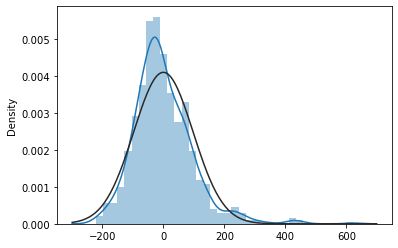

In [52]:
#Step 12
from scipy import stats
sns.distplot(model.resid, fit=stats.norm);

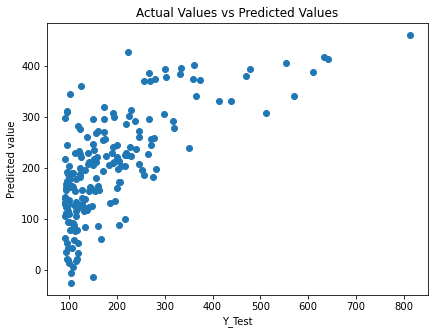

In [54]:
#Step 13
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.set_xlabel("Y_Test")
ax.set_ylabel("Predicted value")
ax.set_title("Actual Values vs Predicted Values")
plt.scatter(y_test, y1_pred)

# Now I will examine the data a few standard deviations away from the mean

### 1/2 Standard Deviation from the mean

In [55]:
y.describe()

,dispersion
count,9997.000000
mean,74.139024
std,58.848546
min,0.000000
25%,55.170160
50%,61.293182
75%,70.379020
max,1039.325700


In [56]:
(y.std())/2

dispersion    29.424273
dtype: float64

In [57]:
print(y.mean() + ((y.std())/2))
print(y.mean() - ((y.std())/2))

dispersion    103.563297
dtype: float64
dispersion    44.714751
dtype: float64


In [58]:
#Step 1
y_1sd = y.copy()

In [59]:
y_1sd = y_1sd[y_1sd['dispersion'].between(44.714751, 103.563297)]
y_1sd.describe()

,dispersion
count,9178.000000
mean,62.419584
std,10.494455
min,44.721070
25%,54.921754
50%,60.400692
75%,67.783170
max,103.525185


In [60]:
#Step 2
df_1sd = df.copy()

In [61]:
#Step 3
df_1sd = df_1sd[df_1sd['dispersion'].between(44.714751, 103.563297)]

In [62]:
#Step 4
df_1sd.shape

(9178, 12)

In [63]:
#Step 5
x_1sd = df_1sd.loc[:, ~df_1sd.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y_1sd = df_1sd.loc[:, df_1sd.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [64]:
#Step 6
x1sd_log = x_1sd.copy()

In [65]:
#Step 7
x1sd_log = x1sd_log.transform(lambda a: np.log(a))

In [66]:
#Step 8
x1sd_log.shape

(9178, 11)

In [67]:
#Step 9
X=x1sd_log
y=y_1sd

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)

In [72]:
#Step 10
X_train.shape, y_test.shape

((7342, 11), (1836, 1))

# Linear Model for values lying within 1/2 Stand Dev

In [73]:
#Step 11
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             dispersion   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     765.2
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:33:13   Log-Likelihood:                -24841.
No. Observations:                7342   AIC:                         4.971e+04
Df Residuals:                    7330   BIC:                         4.979e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.875e+04   2.99e+0

/Users/parth/opt/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


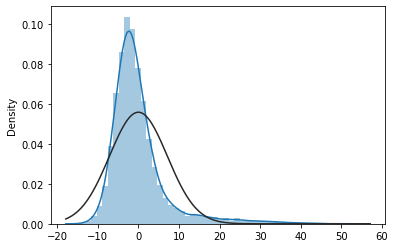

In [74]:
#Step 12
from scipy import stats
sns.distplot(model.resid, fit=stats.norm);

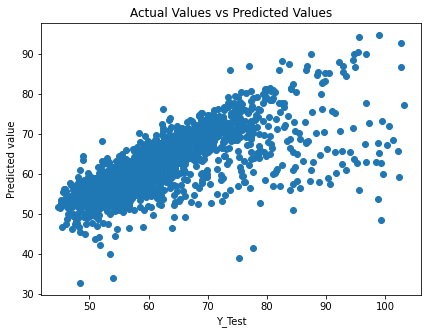

In [75]:
#Step 13
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.set_xlabel("Y_Test")
ax.set_ylabel("Predicted value")
ax.set_title("Actual Values vs Predicted Values")
plt.scatter(y_test, y_pred)

### Now, I will repeat the same steps for attributes not within 1/2 standard deviation from mean

In [79]:
#Step 0
x = df.loc[:, ~df.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y = df.loc[:, df.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [80]:
y.describe()

,dispersion
count,9997.000000
mean,74.139024
std,58.848546
min,0.000000
25%,55.170160
50%,61.293182
75%,70.379020
max,1039.325700


In [81]:
print(y.mean() + ((y.std())/2))
print(y.mean() - ((y.std())/2))

dispersion    103.563297
dtype: float64
dispersion    44.714751
dtype: float64


In [83]:
#Step 1
y_2sd = y.copy()

In [87]:
y_2sd = y_2sd[~y_2sd['dispersion'].between(44.714751, 103.563297)]
y_2sd.describe()

,dispersion
count,819.000000
mean,205.471167
std,149.245006
min,0.000000
25%,115.210110
50%,155.551200
75%,250.017130
max,1039.325700


In [90]:
#Step 2
df_2sd = df.copy()

In [91]:
#Step 3
df_2sd = df_2sd[~df_2sd['dispersion'].between(44.714751, 103.563297)]

In [92]:
#Step 4
df_2sd.shape

(819, 12)

In [100]:
#Step 5
x_2sd = df_2sd.loc[:, ~df_2sd.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y_2sd = df_2sd.loc[:, df_2sd.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [101]:
#Step 6
x2sd_log = x_2sd.copy()

In [102]:
#Step 7
x2sd_log = x2sd_log.transform(lambda a: np.log(a))

In [103]:
#Step 8
x2sd_log.shape

(819, 11)

In [104]:
#Step 9
X=x2sd_log
y=y_2sd

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)

In [105]:
#Step 10
X_train.shape, y_test.shape

((655, 11), (164, 1))

# Linear Model for values lying beyond 1/2 Stand Dev

In [106]:
#Step 11
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             dispersion   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     58.92
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           8.10e-90
Time:                        16:47:27   Log-Likelihood:                -3979.0
No. Observations:                 655   AIC:                             7982.
Df Residuals:                     643   BIC:                             8036.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               4.67e+04   1.52e+0

/Users/parth/opt/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


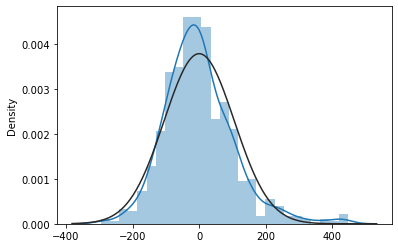

In [107]:
#Step 12
from scipy import stats
sns.distplot(model.resid, fit=stats.norm);

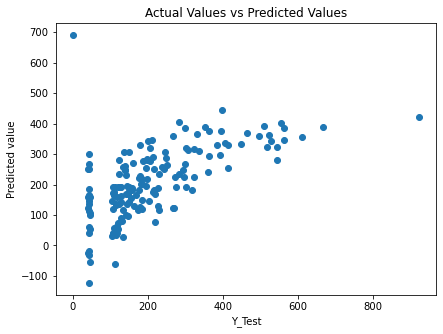

In [108]:
#Step 13
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.set_xlabel("Y_Test")
ax.set_ylabel("Predicted value")
ax.set_title("Actual Values vs Predicted Values")
plt.scatter(y_test, y_pred)

# I will repeat the process 1/4 Standard Deviation from the mean

In [109]:
#Step 0
x = df.loc[:, ~df.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y = df.loc[:, df.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [111]:
y.describe()

,dispersion
count,9997.000000
mean,74.139024
std,58.848546
min,0.000000
25%,55.170160
50%,61.293182
75%,70.379020
max,1039.325700


In [110]:
print(y.mean() + ((y.std())/4))
print(y.mean() - ((y.std())/4))

dispersion    88.851161
dtype: float64
dispersion    59.426887
dtype: float64


In [115]:
#Step 1
y_3sd = y.copy()

In [118]:
y_3sd = y_3sd[y_3sd['dispersion'].between(59.426887, 88.851161)]
y_3sd.describe()

,dispersion
count,4730.000000
mean,68.141830
std,6.953320
min,59.427097
25%,62.490395
50%,66.330933
75%,72.108397
max,88.835266


In [113]:
#Step 2
df_3sd = df.copy()

In [119]:
#Step 3
df_3sd = df_3sd[df_3sd['dispersion'].between(59.426887, 88.851161)]

In [120]:
#Step 4
df_3sd.shape

(4730, 12)

In [121]:
#Step 5
x_3sd = df_3sd.loc[:, ~df_3sd.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y_3sd = df_3sd.loc[:, df_3sd.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [122]:
#Step 6
x3sd_log = x_3sd.copy()

In [123]:
#Step 7
x3sd_log = x3sd_log.transform(lambda a: np.log(a))

In [125]:
#Step 8
x3sd_log.shape

(4730, 11)

In [126]:
#Step 9
X=x3sd_log
y=y_3sd

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)

In [127]:
#Step 10
X_train.shape, y_test.shape

((3784, 11), (946, 1))

# Linear Model for values lying within 1/4 Stand Dev

In [128]:
#Step 11
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             dispersion   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     146.9
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          4.71e-282
Time:                        17:01:39   Log-Likelihood:                -12054.
No. Observations:                3784   AIC:                         2.413e+04
Df Residuals:                    3772   BIC:                         2.421e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.341e+04   3.42e+0

/Users/parth/opt/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


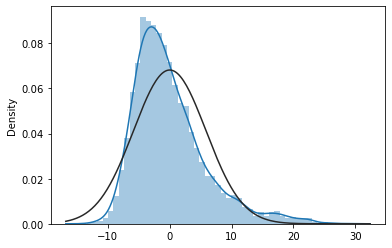

In [129]:
#Step 12
from scipy import stats
sns.distplot(model.resid, fit=stats.norm);

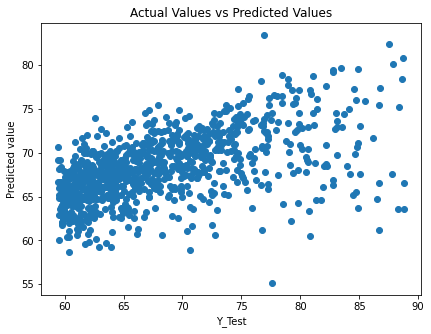

In [130]:
#Step 13
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.set_xlabel("Y_Test")
ax.set_ylabel("Predicted value")
ax.set_title("Actual Values vs Predicted Values")
plt.scatter(y_test, y_pred)

## Now taking elements not present between 1/4 standard deviation of the mean

In [131]:
#Step 0
x = df.loc[:, ~df.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y = df.loc[:, df.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [132]:
#Step 1
y_4sd = y.copy()

In [134]:
y_4sd = y_4sd[~y_4sd['dispersion'].between(59.426887, 88.851161)]
y_4sd.describe()

,dispersion
count,5267.000000
mean,79.524770
std,80.430531
min,0.000000
25%,52.068373
50%,55.477978
75%,58.612896
max,1039.325700


In [135]:
#Step 2
df_4sd = df.copy()

In [136]:
#Step 4
df_4sd = df_4sd[~df_4sd['dispersion'].between(59.426887, 88.851161)]

In [137]:
#Step 4
df_4sd.shape

(5267, 12)

In [138]:
#Step 5
x_4sd = df_4sd.loc[:, ~df_4sd.columns.isin(['dispersion'])] #Creating dependent variables dataframe
y_4sd = df_4sd.loc[:, df_4sd.columns.isin(['dispersion'])]  #Creating predictor variable dataframe

In [139]:
#Step 6
x4sd_log = x_4sd.copy()

In [140]:
#Step 7
x4sd_log = x4sd_log.transform(lambda a: np.log(a))

In [141]:
#Step 8
x4sd_log.shape

(5267, 11)

In [142]:
#Step 9
X=x4sd_log
y=y_4sd

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)

In [143]:
#Step 10
X_train.shape, y_test.shape

((4213, 11), (1054, 1))

# Linear Model for values lying beyond 1/4 Stand Dev

In [144]:
#Step 11
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             dispersion   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     202.7
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:07:11   Log-Likelihood:                -23448.
No. Observations:                4213   AIC:                         4.692e+04
Df Residuals:                    4201   BIC:                         4.700e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.533e+05   3.53e+0

/Users/parth/opt/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


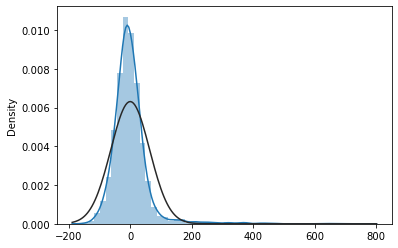

In [145]:
#Step 12
from scipy import stats
sns.distplot(model.resid, fit=stats.norm);

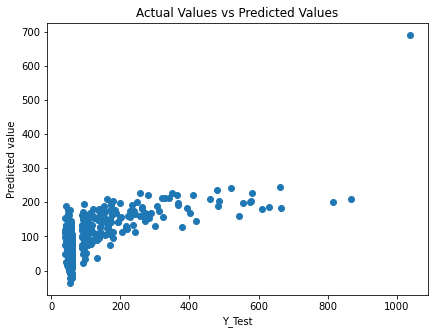

In [146]:
#Step 13
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.set_xlabel("Y_Test")
ax.set_ylabel("Predicted value")
ax.set_title("Actual Values vs Predicted Values")
plt.scatter(y_test, y_pred)